In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from collections import Counter



In [2]:
df = pd.read_csv('Copy of e-Commerce for interns - 52 e-Commerce Jobs in Germany.csv')
df

,Job Title,Category,Company,City,Salary Min (€),Salary Max (€),Experience,German Level,English Level,Key Hard Skills,Software/Tools
0,Marketplace Manager,MP,Beiersdorf,Hamburg,65000,75000,3–5 years,C1,B2,"Amazon, Otto, Zalando, KPI analysis","Seller Central, ChannelEngine, Excel"
1,Amazon Specialist,MP,Douglas,Düsseldorf,55000,65000,2–4 years,B2,B2,"FBA, Sponsored Ads, A+ Content","Vendor Central, Helium 10, Excel"
2,E-Commerce Marketplace Coordinator,MP,dm-drogerie,Karlsruhe,50000,60000,1–3 years,C1,A2,"eBay, Otto, content upload","Lengow, PIM, SAP"
3,Marketplace Operations Manager,MP,Adidas,Herzogenaurach,70000,85000,4–6 years,B2,C1,"Global marketplaces, logistics","Mirakl, SAP, Tableau"
4,Amazon Account Manager,MP,Nestlé Germany,Frankfurt,60000,70000,3–5 years,C1,B2,"Vendor Central, trade funds","Nielsen, Retail Link, Excel"
5,Marketplace Specialist (DACH),MP,Philips,Hamburg,58000,68000,2–4 years,C1,B2,"Amazon DE/AT/CH, SEO","Seller Central, SEMrush, Power BI"
6,E-Commerce Sales Manager,OS,Bosch,Stuttgart,70000,85000,5+ years,C1,C1,"B2B online sales, CRM","Salesforce, SAP, Shopware"
7,Online Sales Specialist,OS,Siemens Healthineers,Erlangen,60000,72000,3–5 years,C1,B2,"Digital quoting, contract management","SAP Hybris, MS Dynamics"
8,Digital Sales Manager,OS,Henkel,Düsseldorf,65000,78000,4–6 years,C1,B2,E-commerce channel strategy,"Salesforce, Tableau, Excel"
9,E-Commerce Account Manager,OS,BASF,Ludwigshafen,68000,80000,4–7 years,C1,C1,"Key account management, EDI","SAP, CRM, Power BI"


In [ ]:
df.head(5)

,Job Title,Category,Company,City,Salary Min (€),Salary Max (€),Experience,German Level,English Level,Key Hard Skills,Software/Tools
0,Marketplace Manager,MP,Beiersdorf,Hamburg,65000,75000,3–5 years,C1,B2,"Amazon, Otto, Zalando, KPI analysis","Seller Central, ChannelEngine, Excel"
1,Amazon Specialist,MP,Douglas,Düsseldorf,55000,65000,2–4 years,B2,B2,"FBA, Sponsored Ads, A+ Content","Vendor Central, Helium 10, Excel"
2,E-Commerce Marketplace Coordinator,MP,dm-drogerie,Karlsruhe,50000,60000,1–3 years,C1,A2,"eBay, Otto, content upload","Lengow, PIM, SAP"
3,Marketplace Operations Manager,MP,Adidas,Herzogenaurach,70000,85000,4–6 years,B2,C1,"Global marketplaces, logistics","Mirakl, SAP, Tableau"
4,Amazon Account Manager,MP,Nestlé Germany,Frankfurt,60000,70000,3–5 years,C1,B2,"Vendor Central, trade funds","Nielsen, Retail Link, Excel"


In [3]:
df.describe()

,Salary Min (€),Salary Max (€)
count,53.000000,53.000000
mean,60622.641509,72735.849057
std,7427.149819,9483.084015
min,48000.000000,56000.000000
25%,55000.000000,65000.000000
50%,60000.000000,72000.000000
75%,65000.000000,80000.000000
max,80000.000000,95000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job Title        53 non-null     object
 1   Category         53 non-null     object
 2   Company          53 non-null     object
 3   City             53 non-null     object
 4   Salary Min (€)   53 non-null     int64 
 5   Salary Max (€)   53 non-null     int64 
 6   Experience       53 non-null     object
 7   German Level     53 non-null     object
 8   English Level    53 non-null     object
 9   Key Hard Skills  53 non-null     object
 10  Software/Tools   53 non-null     object
dtypes: int64(2), object(9)
memory usage: 4.7+ KB


In [6]:
category_counts = df['Category'].value_counts()
category_counts

,count
Category,
OM,19
MP,17
OS,15
MP+OS,1
OM+OS,1


# **1. Verteilung der offenen Stellen nach Kategorien (Category)**
**Ziel:** Ermitteln, welche Bereiche (Marktplatz, Online-Vertrieb, Online-Marketing usw.) am stärksten nachgefragt werden.

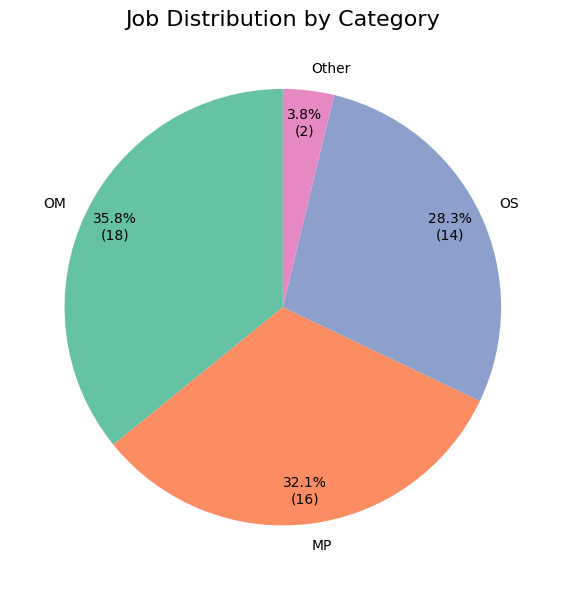

In [7]:
# Nur Kategorien mit mindestens 3 freien Stellen werden beibehalten
threshold = 3
top_categories = category_counts[category_counts >= threshold]
other_count = category_counts[category_counts < threshold].sum()

# Erstellen eine neue Serie mit der Option "Other"
if other_count > 0:
    top_categories['Other'] = other_count

plt.figure(figsize=(8, 6))
top_categories.plot.pie(
    autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100.*top_categories.sum())})',
    startangle=90,
    colors=sns.color_palette('Set2', len(top_categories)),
    ylabel='',
    pctdistance=0.85,
    labeldistance=1.1
)
plt.title('Job Distribution by Category', fontsize=16)
plt.tight_layout()
plt.show()

# **2. Top 10 Städte nach Anzahl der offenen Stellen**
**Ziel:** Die geografische Konzentration von Arbeitsplätzen ermitteln.

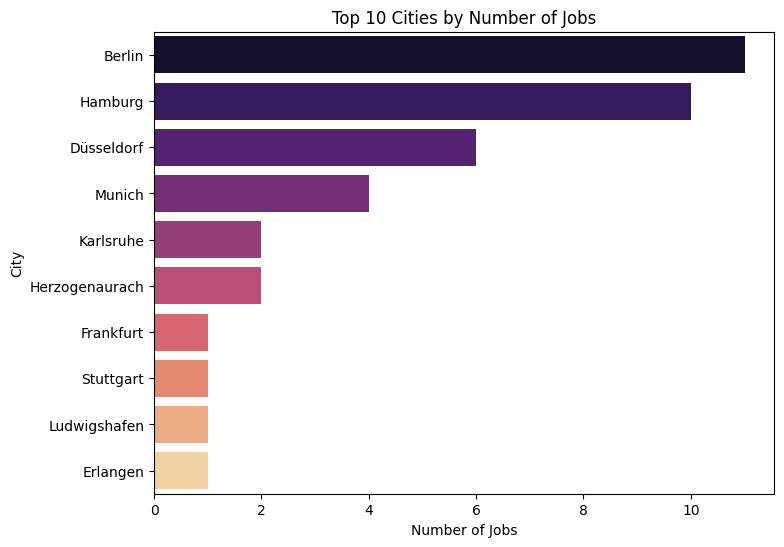

In [8]:
top_cities = df['City'].value_counts().head(10)

plt.figure(figsize=(8, 6))
sns.barplot(
    x=top_cities.values,
    y=top_cities.index,
    hue=top_cities.index,
    palette='magma',
    legend=False
)
plt.title('Top 10 Cities by Number of Jobs', fontsize=12)
plt.xlabel('Number of Jobs')
plt.show()

**Erstellen einer Spalte für das Durchschnittsgehalt**

In [9]:
df['Avg Salary'] = (df['Salary Min (€)'] + df['Salary Max (€)']) / 2
df

,Job Title,Category,Company,City,Salary Min (€),Salary Max (€),Experience,German Level,English Level,Key Hard Skills,Software/Tools,Avg Salary
0,Marketplace Manager,MP,Beiersdorf,Hamburg,65000,75000,3–5 years,C1,B2,"Amazon, Otto, Zalando, KPI analysis","Seller Central, ChannelEngine, Excel",70000.0
1,Amazon Specialist,MP,Douglas,Düsseldorf,55000,65000,2–4 years,B2,B2,"FBA, Sponsored Ads, A+ Content","Vendor Central, Helium 10, Excel",60000.0
2,E-Commerce Marketplace Coordinator,MP,dm-drogerie,Karlsruhe,50000,60000,1–3 years,C1,A2,"eBay, Otto, content upload","Lengow, PIM, SAP",55000.0
3,Marketplace Operations Manager,MP,Adidas,Herzogenaurach,70000,85000,4–6 years,B2,C1,"Global marketplaces, logistics","Mirakl, SAP, Tableau",77500.0
4,Amazon Account Manager,MP,Nestlé Germany,Frankfurt,60000,70000,3–5 years,C1,B2,"Vendor Central, trade funds","Nielsen, Retail Link, Excel",65000.0
5,Marketplace Specialist (DACH),MP,Philips,Hamburg,58000,68000,2–4 years,C1,B2,"Amazon DE/AT/CH, SEO","Seller Central, SEMrush, Power BI",63000.0
6,E-Commerce Sales Manager,OS,Bosch,Stuttgart,70000,85000,5+ years,C1,C1,"B2B online sales, CRM","Salesforce, SAP, Shopware",77500.0
7,Online Sales Specialist,OS,Siemens Healthineers,Erlangen,60000,72000,3–5 years,C1,B2,"Digital quoting, contract management","SAP Hybris, MS Dynamics",66000.0
8,Digital Sales Manager,OS,Henkel,Düsseldorf,65000,78000,4–6 years,C1,B2,E-commerce channel strategy,"Salesforce, Tableau, Excel",71500.0
9,E-Commerce Account Manager,OS,BASF,Ludwigshafen,68000,80000,4–7 years,C1,C1,"Key account management, EDI","SAP, CRM, Power BI",74000.0


# **3. Durchschnittsgehalt nach Kategorie**

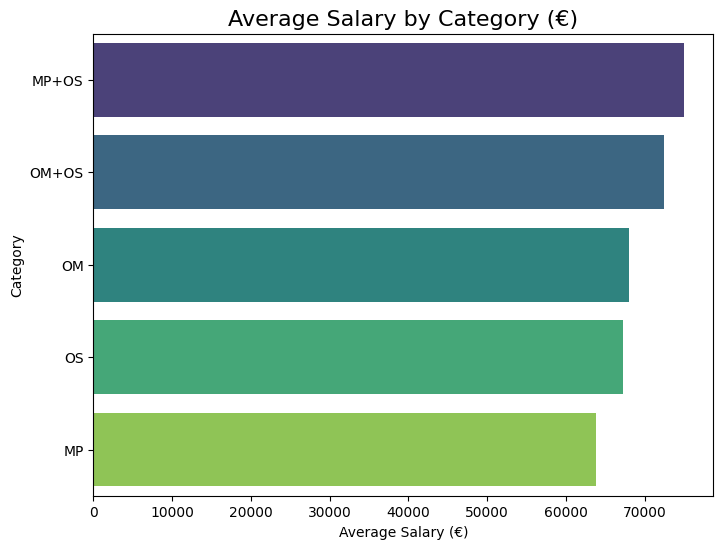

In [10]:
avg_salary_by_cat = df.groupby('Category')['Avg Salary'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(
    x=avg_salary_by_cat.values,
    y=avg_salary_by_cat.index,
    hue=avg_salary_by_cat.index,
    palette='viridis',
    legend=False
)
plt.title('Average Salary by Category (€)', fontsize=16)
plt.xlabel('Average Salary (€)')
plt.show()

# **4. Gehaltsspannen nach Kategorie**
**Ziel**: Die Gehaltsspannen innerhalb jeder Kategorie anzeigen.

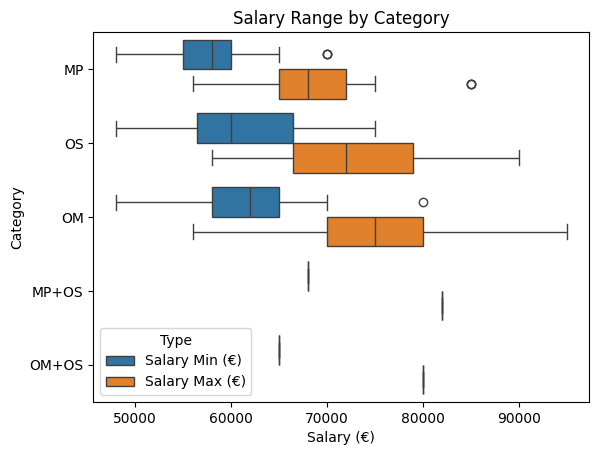

In [11]:
salary_df = pd.melt(df, id_vars=['Category'], value_vars=['Salary Min (€)', 'Salary Max (€)'],
                    var_name='Type', value_name='Salary')
sns.boxplot(data=salary_df, x='Salary', y='Category', hue='Type')
plt.title('Salary Range by Category')
plt.xlabel('Salary (€)')
plt.show()

# **5. Anforderungen an die Deutschkenntnisse**
**Ziel**: Die Bedeutung der deutschen Sprache verstehen.

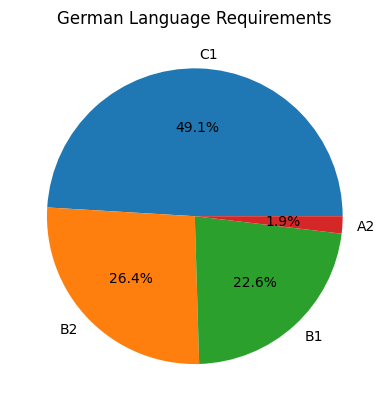

In [12]:
df['German Level'].value_counts().plot.pie(autopct='%1.1f%%', title='German Language Requirements')
plt.ylabel('')
plt.show()

# **6. Die 10 gefragtesten Fachkompetenzen**
**Ziel**: Die gefragtesten Kompetenzen ermitteln.

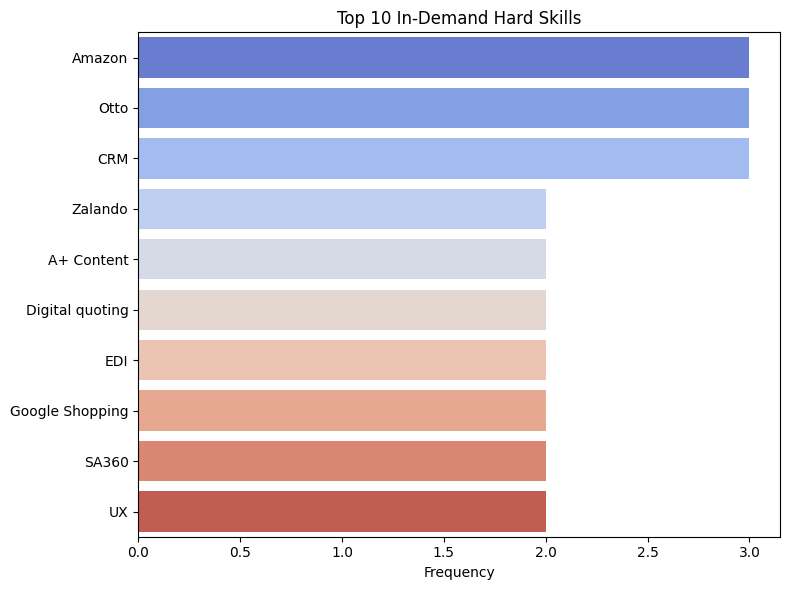

In [13]:
# Alle Hard Skills extrahieren
all_skills = []
for skills in df['Key Hard Skills'].dropna():

# Durch Kommas trennen, Leerzeichen berücksichtigen
    parts = re.split(r',\s*', str(skills))
    all_skills.extend([s.strip() for s in parts])


# Berechnen Sie die Häufigkeit
skill_counts = Counter(all_skills)
top_skills = dict(skill_counts.most_common(10))

skills_names = list(top_skills.keys())
skills_freq = list(top_skills.values())

plt.figure(figsize=(8, 6))
sns.barplot(
    x=skills_freq,
    y=skills_names,
    hue=skills_names,
    palette='coolwarm',
    legend=False
)
plt.title('Top 10 In-Demand Hard Skills', fontsize=12)
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

# **7. Verhältnis der englischen und deutschen Sprachen**

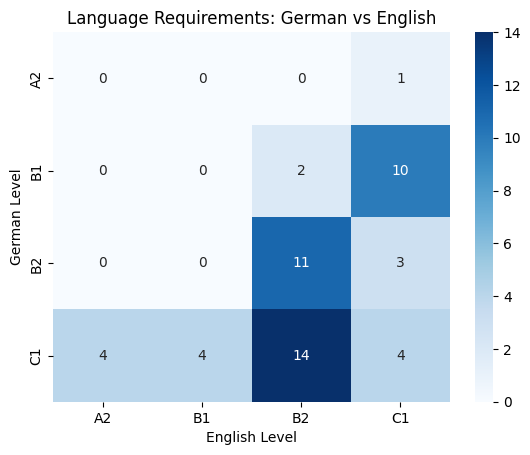

In [14]:
ct = pd.crosstab(df['German Level'], df['English Level'])
sns.heatmap(ct, annot=True, cmap='Blues')
plt.title('Language Requirements: German vs English')
plt.show()

# **8. Durchschnittsgehalt nach Stadt (Top 10)**

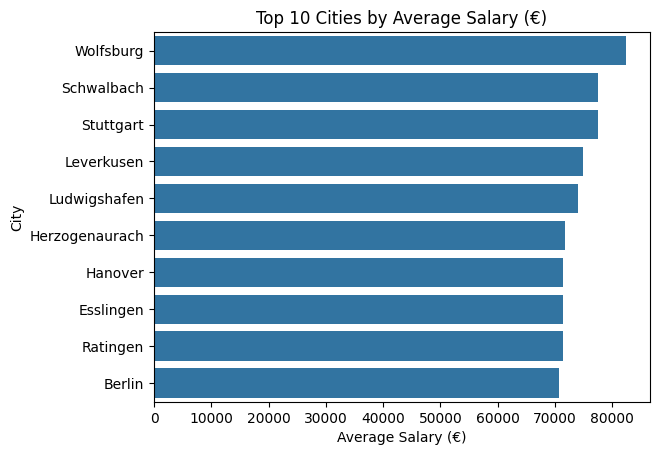

In [15]:
city_salary = df.groupby('City')['Avg Salary'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=city_salary.values, y=city_salary.index)
plt.title('Top 10 Cities by Average Salary (€)')
plt.xlabel('Average Salary (€)')
plt.show()

# **9. Erforderliche Berufserfahrung**

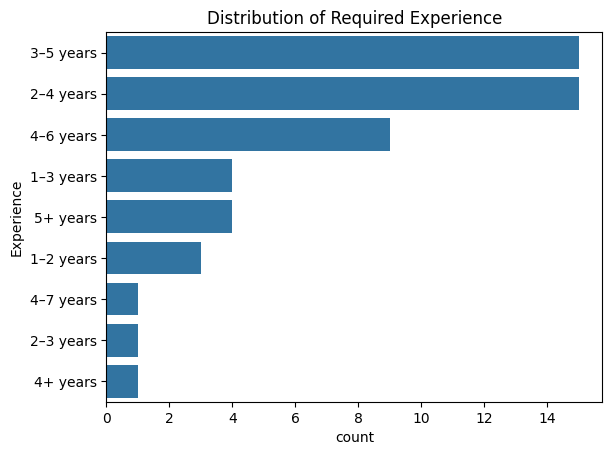

In [16]:
sns.countplot(data=df, y='Experience', order=df['Experience'].value_counts().index)
plt.title('Distribution of Required Experience')
plt.show()

# **10. Soft skills**

In [17]:
# Soft-Skill-Kategorien und Schlüsselwörter definieren
soft_skill_keywords = {
    'Strategic Thinking': ['strategy', 'roadmap', 'planning', 'omnichannel'],
    'Leadership & Management': ['P&L', 'management', 'lead', 'manager', 'stakeholder'],
    'Communication & Collaboration': ['cross-functional', 'coordination', 'collaboration', 'team'],
    'Customer Focus': ['customer journey', 'UX', 'retention', 'customer-centric', 'journey'],
    'Problem Solving & Analytical Thinking': ['optimization', 'A/B', 'troubleshooting', 'analysis', 'funnel', 'CR', 'AOV', 'ROAS'],
    'Adaptability & Innovation': ['innovation', 'agile', 'fast-paced', 'digital transformation', 'growth'],
    'Project Management': ['project', 'Jira', 'timeline', 'delivery', 'coordination']
}

# Alle Textfelder für die Suche kombinieren
df['Text'] = df['Key Hard Skills'].fillna('') + ' ' + df['Job Title'].fillna('') + ' ' + df['Software/Tools'].fillna('')


# Anzahl der Erwähnungen
soft_skill_counts = {category: 0 for category in soft_skill_keywords}

for _, row in df.iterrows():
    text = row['Text'].lower()
    for category, keywords in soft_skill_keywords.items():
        for kw in keywords:
            if kw.lower() in text:
                soft_skill_counts[category] += 1
                break

soft_skills_df = pd.DataFrame(list(soft_skill_counts.items()), columns=['Soft Skill', 'Count']).sort_values('Count', ascending=False)


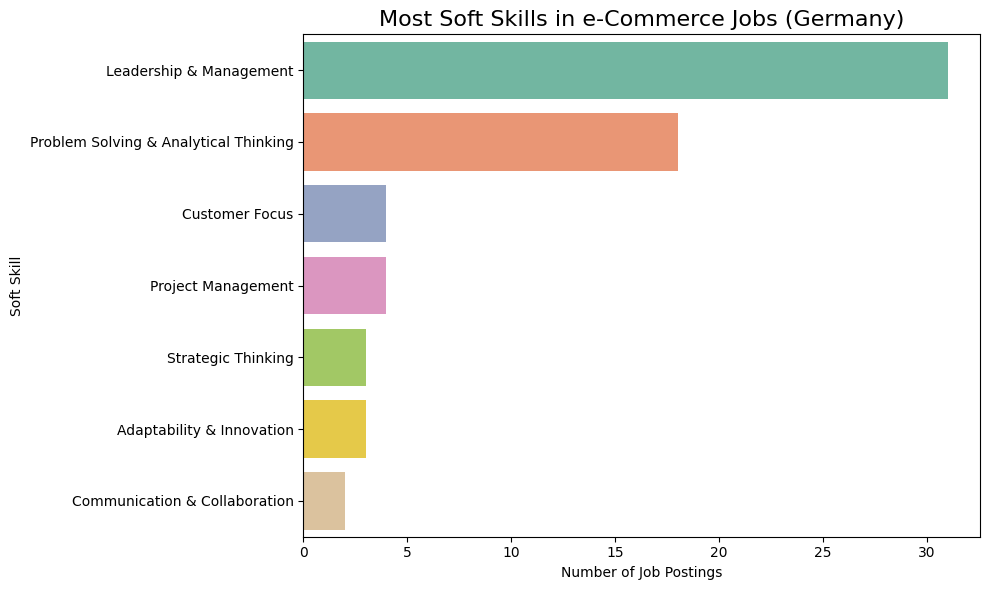

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=soft_skills_df,
    x='Count',
    y='Soft Skill',
    hue='Soft Skill',
    palette='Set2',
    legend=False
)
plt.title('Most Soft Skills in e-Commerce Jobs (Germany)', fontsize=16)
plt.xlabel('Number of Job Postings')
plt.tight_layout()
plt.show()

# **VIELEN DANK AN ALLE!!!!!!!!**